In [ ]:
import escape as esc
import numpy as np
import matplotlib.pyplot as plt
from escape.utils.widgets import show
esc.require("0.9.7")

In [ ]:
q = esc.var("Q")

# SAXS. Form-factors. Cylinder

Original: https://www.ncnr.nist.gov/resources/sansmodels/Cylinder.html

Author: Denis Korolkov

Calculates the form factor for a monodisperse right circular cylinder with uniform scattering length density. The form factor is normalized by the particle volume such that $P(q) = I0*\left<f^2\right>/V + B$, where < > is an average over all possible orientations of the cylinder.

## Parameters


Parameter|	Variable|	Value
---------|----------|---------
0|	Scale|	1.0
1|	Radius (Å)|	20.0
2|	Length (Å)|	400.0
3|	Contrast ($Å^{-2}$)|	3.0e-6
4|	Incoherent Background ($cm^{-1}$)|	0.0

## Usage notes

The function calculated is:

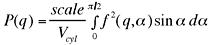

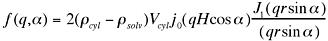

 and 

where $J_1(x)$ is the first order Bessel function. Alpha is defined as the angle between the cylinder axis and the scattering vector, $q$. The integral over alpha averages the form factor over all possible orientations of the cylinder with respect to $q$. The returned value is in units of $cm^{-1}$, on absolute scale.



Parameter[0] (scale) and Parameter[3] (contrast) are both multiplicative factors in the model and are perfectly correlated. One or both of these parameters must be held fixed during model fitting.


In [ ]:
#Definition of parameters
I0 = esc.par("Scale", 1, scale=1e8, fixed=True)
R = esc.par("Radius", 20, units=esc.angstr)
L = esc.par("Length", 400, units=esc.angstr)
rho = esc.par("Contrast", 3, scale=1e-6, units=f"{esc.angstr}⁻²")
bkgr = esc.par("Background", 0.0, userlim=[0, 0.03])

#Model equations
V = np.pi*R**2*L

H=L/2

alpha = esc.var("alpha")

j0 = esc.sin(q*H*esc.cos(alpha))/(q*H*esc.cos(alpha))
j1 = esc.cyl_bessel_j(1, q*R*esc.sin(alpha))/(q*R*esc.sin(alpha))

F = 2*rho*V*j0*j1
P = I0/V*esc.integral(F**2*esc.sin(alpha), alpha, 0, np.pi/2.0, maxiter=50, epsabs=1e-8, epsrel=1e-8)

show(P, coordinates=np.linspace(0.001, 0.7, 128), figtitle="Cylinder", 
     xlog=True, ylog=True, xlabel=f"Q[{esc.angstr}⁻¹]", ylabel="P(q)[cm⁻¹]")